In [1]:
#import the libraries
import os

%run "C:\\Users\\David\\Dropbox\\KAROLINSKA\\task\\POSITIONS\\L3_d0,2&7_rad8_resp_same\\Funciones.ipynb"

os.chdir('/home/david/Dropbox/KAROLINSKA/fMRI_beh_analysis')
#%run 'create_data_file_fMRI_data.ipynb'
from scipy.stats import norm, ttest_1samp
from numpy import polyfit, poly1d
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pandas import concat
import pickle
from pickle import *
import statsmodels.nonparametric.smoothers_lowess as loess


/home/david/PYTHON/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
#Load data
df = pd.read_pickle('data_fMRI')
list_subjects = [int(df.subject.unique()[i]) for i in range(0, len(df.subject.unique()))]
len(df)



126

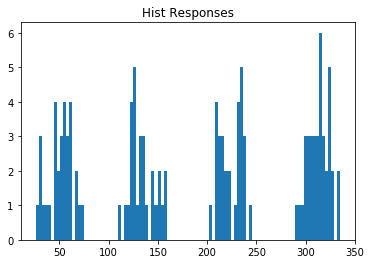

In [13]:
len(df)
df.columns
df.A_res

plt.title('Hist Responses')
plt.hist(df['A_res'], bins=100)
plt.show()

number of trials =  126
N =  2


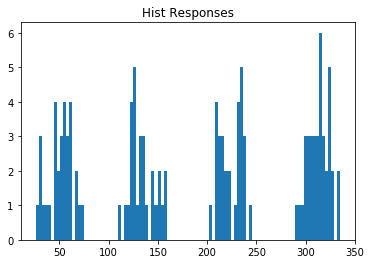

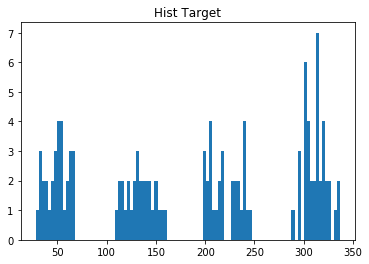

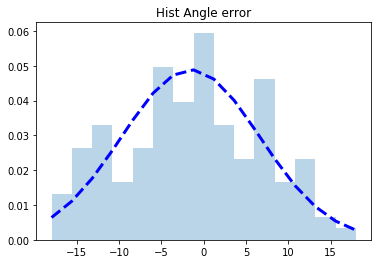

Mean     Sigma
-1.547619  8.160695


In [14]:
#Plot data
n_trials=len(df)
print('number of trials = ', n_trials)
N=len(unique(df.subject))
print('N = ', N)

#Security controls
plt.title('Hist Responses')
plt.hist(df['A_res'], bins=100)
plt.show()

plt.title('Hist Target')
plt.hist(df['A_T'], bins=100)
plt.show()


plt.title('Hist Angle error')
n_bins=15
HIST=plt.hist(df['A_err'], bins=n_bins, alpha=0.3, normed=1)[1]
mu, sigma=norm.fit(df['A_err'])
y_err = plt.mlab.normpdf(HIST, mu, sigma)
plt.plot( HIST, y_err, 'b--', linewidth=3)
plt.show()
dn = pd.DataFrame({"Mean": [mu], "Sigma":[sigma]})
print(dn.to_string(index=False))


/home/david/PYTHON/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 1 samples were given.
  "samples were given." % int(n), ValueWarning)
/home/david/PYTHON/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/david/PYTHON/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/home/david/PYTHON/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
/home/david/PYTHON/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: inva

                            OLS Regression Results                            
Dep. Variable:          Repulsion_ref   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 10 Sep 2018   Prob (F-statistic):                nan
Time:                        12:47:33   Log-Likelihood:                    inf
No. Observations:                   1   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0        nan        nan        n

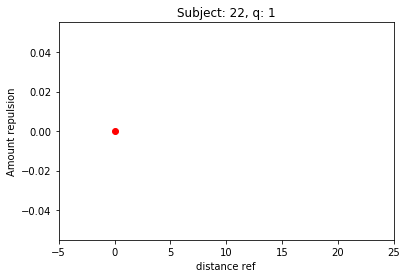

                            OLS Regression Results                            
Dep. Variable:          Repulsion_ref   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     13.51
Date:                Mon, 10 Sep 2018   Prob (F-statistic):              0.169
Time:                        12:47:33   Log-Likelihood:                -6.4029
No. Observations:                   3   AIC:                             16.81
Df Residuals:                       1   BIC:                             15.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.2836      4.391      3.708      0.1

/home/david/PYTHON/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


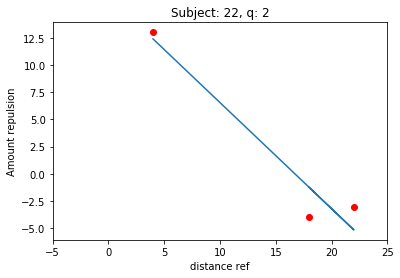

                            OLS Regression Results                            
Dep. Variable:          Repulsion_ref   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.089
Date:                Mon, 10 Sep 2018   Prob (F-statistic):              0.373
Time:                        12:47:33   Log-Likelihood:                -13.313
No. Observations:                   5   AIC:                             30.63
Df Residuals:                       3   BIC:                             29.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0130      3.513      0.573      0.6

/home/david/PYTHON/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


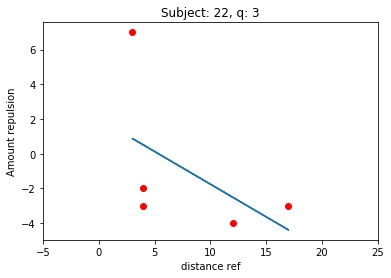

                            OLS Regression Results                            
Dep. Variable:          Repulsion_ref   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                 -0.263
Method:                 Least Squares   F-statistic:                    0.5831
Date:                Mon, 10 Sep 2018   Prob (F-statistic):              0.585
Time:                        12:47:33   Log-Likelihood:                -8.9523
No. Observations:                   3   AIC:                             21.90
Df Residuals:                       1   BIC:                             20.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7429      8.190      0.823      0.5

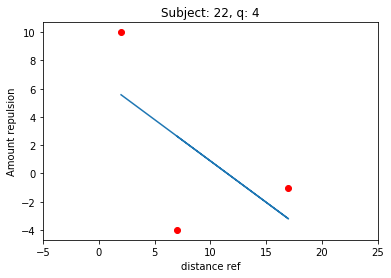

ValueError: zero-size array to reduction operation maximum which has no identity

In [15]:
#Remove the quadrant bias & Remove the mean error (3 Steps)
#Step 1: get the ceoficients of the liniar model in each quadrant and subject 
params={}


## Add octaves
df['octave'] = [get_octave(df.A_T.iloc[i]) for i in range(0, len(df))]
df.head()


for Subject in list_subjects:
    #Data to estimate the LM (ideally it would be type 4 trials)
    #data_SUBJ = df.loc[(df['subject']==Subject) & (df['type']==3)]
    
    #Estimate for each quadrant
    for q, octave in enumerate([1,2,3,4,5,6,7,8]):
        
        #Select data
        data_octave = df.loc[(df['subject']==Subject) & (df['type']!=4) & (df['octave']==octave) ]
        
        #distance to the closest reference (axis and diagonals) from T and response
        dist_ref_T=[]
        dist_ref_R=[]
        for i in range (0, len(data_octave)):
            t, r = data_octave['A_T'].iloc[i], data_octave['A_res'].iloc[i]
            distT, distR = get_dist_ref(t, r)
            dist_ref_T.append(distT)
            dist_ref_R.append(distR)

        dist_ref_T = array(dist_ref_T)
        dist_ref_R = array(dist_ref_R)
        
        #LM: amount repulsion (repulsion = + in this case)
        y=list((dist_ref_R-dist_ref_T).reshape(1, len(data_octave))[0])
        x=list(dist_ref_T.reshape(1, len(data_octave))[0])
        df_LM = pd.DataFrame({"Repulsion_ref":  y, "distancia": x})
        result = smf.ols(formula="Repulsion_ref ~ distancia", data=df_LM).fit()
        print(result.summary())
        
        # Plot for Subject and quadrant
        # use the polyfit function for the plot (line) link https://www.youtube.com/watch?v=yP-7Hhqngbo
        coefs=polyfit(x,y,1) 
        params[str(Subject) + '_' +str(octave)] = coefs
        polinomio=poly1d(coefs)
        #get te line with the expected ys
        ys=polinomio(x)
        plt.title('Subject: ' + str(Subject) +', q: ' + str(octave))
        plt.plot(x,y, 'ro')
        plt.plot(x,ys)
        plt.xlim(-5,25)
        plt.xlabel('distance ref')
        plt.ylabel('Amount repulsion')
        plt.show(block=False)
        plt.show()

        
#Step 2: Remove the effect of the quadrant bias of the target 
Target_bias_corr=[]
for i in range(0, len(df) ):
    coef_use = str(int(df['subject'].iloc[i])) + '_' +str(int(df['cue_resp'].iloc[i]))
    bias_corrected = correct_bias_ref2(df['A_T'].iloc[i], df['A_res'].iloc[i],  params[coef_use])
    Target_bias_corr.append(round(bias_corrected,3))


#Set the new error after substracting the bias
df['A_T_bc'] = Target_bias_corr
df['A_err'] = df[['A_T_bc', 'A_res']].apply(angle_error_col, axis=1)  #df['A_T'] - df['A_R']


print(df.A_err.mean())
# #Step3 :Mean center by quadrant
Mean_error={}

for Subject in list_subjects:
    for q, quadrant in enumerate([1,2,3,4]):        
        data_quadrant = df.loc[(df['subject']==Subject) & (df['type']!=4) & (df['cue_resp']==quadrant) ]
        Mean_error[str(Subject) + '_' +str(quadrant)] = data_quadrant.A_err.mean()
        #print(Mean_error)


        
response_corr=[]
for i in range(0, len(df) ):
    coef_use = str(int(df['subject'].iloc[i])) + '_' +str(int(df['cue_resp'].iloc[i]))
    mean_centered = df['A_res'].iloc[i] + Mean_error[coef_use]
    response_corr.append(round(mean_centered,3))


#Set the new error after mean centering
df['A_R'] = response_corr
df['A_err'] = df[['A_T_bc', 'A_R']].apply(angle_error_col, axis=1) 

print(df.A_err.mean())



In [16]:
## Add the Interference effect of both
corrected_interference = Interference_effects(list(df.A_T_bc), list(df.A_R), list(df.A_dist))
df['Interference'] = corrected_interference


AttributeError: 'DataFrame' object has no attribute 'A_T_bc'

In [ ]:
plt.figure()
plt.title('Error after ref bias correction')
plt.plot(df.A_T, df.A_err_raw, 'bo', label='old')
plt.plot(df.A_T, df.A_err, 'ro', label='new')
plt.xlabel('Angle target')
plt.ylabel('Angle error')

plt.legend(loc=4)
plt.show()

In [ ]:
#Save in a file named data_L3_distractors_fMRI (pickle)
df.to_pickle('data_fMRI_corrected')
os.chdir('/home/david/Dropbox/KAROLINSKA/fMRI_beh_analysis')
pickle.dump( df, open( "data_L3_distractors_fMRI_corrected.p", "wb" ) )

In [ ]:
len(df)